使用标准普尔指数SP500，从2012年1月4日至2017年2月1日。

In [1]:
import keras
from keras.layers import LSTM,Input,Dropout,Dense,GRU,BatchNormalization,Add
from keras import Model
from keras import backend as K
from keras.layers import Layer
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'keras'

In [9]:
da = pd.read_csv("res.csv")
data = da['V1'].map(lambda x:float(x)).values

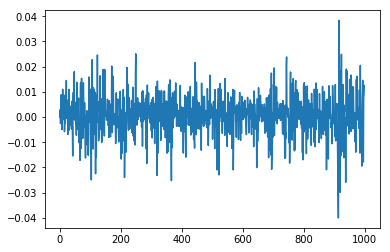

In [14]:
from matplotlib import pyplot as plt
plt.plot(data)
plt.show()

In [36]:
def ann_vol(data,lag):
    pstd = []
    for i in range(data.shape[0]-lag-1):
        x = np.std(data[i:i+lag])
        pstd.append(x)
    return np.array(pstd)

def ann_model(data,lag):    
    pstd = []
    for i in range(data.shape[0]-lag):
        x = np.std(data[i:i+lag])
        pstd.append(x)
    pstd = np.array(pstd)
    red_pred = data[lag:]/pstd
    return red_pred

std_red = ann_model(data,lag = 10)

In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(std_red**2,10)

(array([ 0.15037275,  1.27198457,  1.2809241 ,  2.07053241,  2.29799492,
         5.6490403 , 12.44051023, 13.45355469, 13.51617737, 15.88052827]),
 array([0.6981794 , 0.5294099 , 0.73366774, 0.72278781, 0.80656132,
        0.46362926, 0.08697172, 0.09716792, 0.1406065 , 0.10310387]))

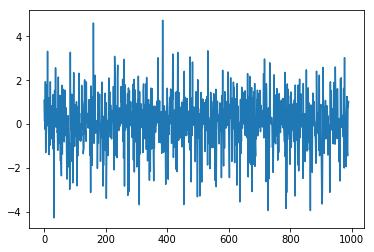

In [19]:
plt.plot(std_red)

### Egarch的预测波动率

In [22]:
sigma = pd.read_csv("sigma.csv")
sigma = sigma['V1'].map(lambda x:float(x)).values

In [28]:
#计算RV
def realized_volatility(data,lag):
    pstd = []
    for i in range(data.shape[0]-lag):
        x = np.std(data[i:i+lag])
        pstd.append(x)
    return np.array(pstd)
def rmse(y_true,y_pred):
    return (np.mean((y_true-y_pred)**2.))**0.5

In [25]:
rv_22 = realized_volatility(data,22)

In [32]:
print("egarch模型的rmse值为{:.5f}".format(rmse(sigma[22:],rv_22)))

egarch模型的rmse值为0.00321


In [37]:
new_vol = ann_vol(data,10)

In [45]:
print("ann_garch模型的rmse值为{:.5f}".format(rmse(new_vol[11:]+0.004,rv_22)))

ann_garch模型的rmse值为0.00410
